# Question 9.1 — PCA + Regression in R
## Goal:
Use PCA on the `uscrime` dataset, then build a regression model using the first few principal components. Translate the resulting model back into the original variable space, and compare model quality with the original regression model (from Question 8.2).

In [2]:
# Load required libraries
library(tidyverse)

# Read in the dataset from the local file (same directory as notebook)
crime_data <- read.table("uscrime.txt", header = TRUE)

# Preview the first few rows
head(crime_data)


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
2,14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
3,14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
4,13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
5,14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234
6,12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682


## Step 2: Apply PCA

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.4534 1.6739 1.4160 1.07806 0.97893 0.74377 0.56729
Proportion of Variance 0.4013 0.1868 0.1337 0.07748 0.06389 0.03688 0.02145
Cumulative Proportion  0.4013 0.5880 0.7217 0.79920 0.86308 0.89996 0.92142
                           PC8     PC9    PC10    PC11    PC12    PC13   PC14
Standard deviation     0.55444 0.48493 0.44708 0.41915 0.35804 0.26333 0.2418
Proportion of Variance 0.02049 0.01568 0.01333 0.01171 0.00855 0.00462 0.0039
Cumulative Proportion  0.94191 0.95759 0.97091 0.98263 0.99117 0.99579 0.9997
                          PC15
Standard deviation     0.06793
Proportion of Variance 0.00031
Cumulative Proportion  1.00000

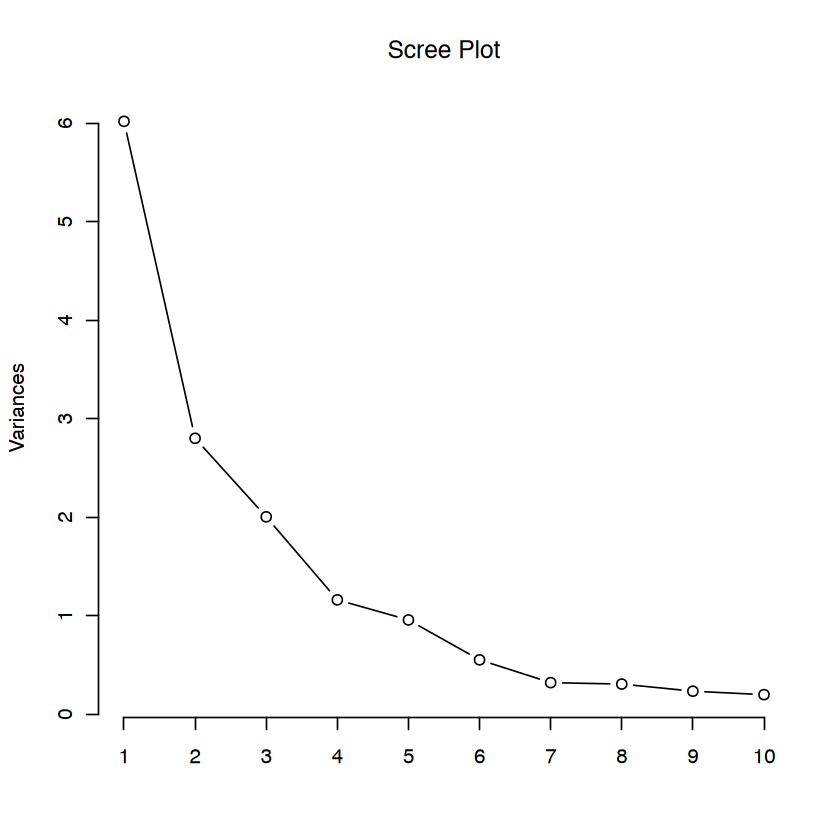

In [3]:
# Remove the response variable (Crime) for PCA
predictors <- crime_data %>% select(-Crime)

# Run PCA with scaling
pca_result <- prcomp(predictors, scale. = TRUE)

# Scree plot to decide how many components to retain
plot(pca_result, type = "l", main = "Scree Plot")

# Show cumulative proportion of variance
summary(pca_result)


## Step 3: Build Regression on First Few Principal Components

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.4534 1.6739 1.4160 1.07806 0.97893 0.74377 0.56729
Proportion of Variance 0.4013 0.1868 0.1337 0.07748 0.06389 0.03688 0.02145
Cumulative Proportion  0.4013 0.5880 0.7217 0.79920 0.86308 0.89996 0.92142
                           PC8     PC9    PC10    PC11    PC12    PC13   PC14
Standard deviation     0.55444 0.48493 0.44708 0.41915 0.35804 0.26333 0.2418
Proportion of Variance 0.02049 0.01568 0.01333 0.01171 0.00855 0.00462 0.0039
Cumulative Proportion  0.94191 0.95759 0.97091 0.98263 0.99117 0.99579 0.9997
                          PC15
Standard deviation     0.06793
Proportion of Variance 0.00031
Cumulative Proportion  1.00000

Total number of components: 15 
Variance explained by first 3 components: 72.2 %


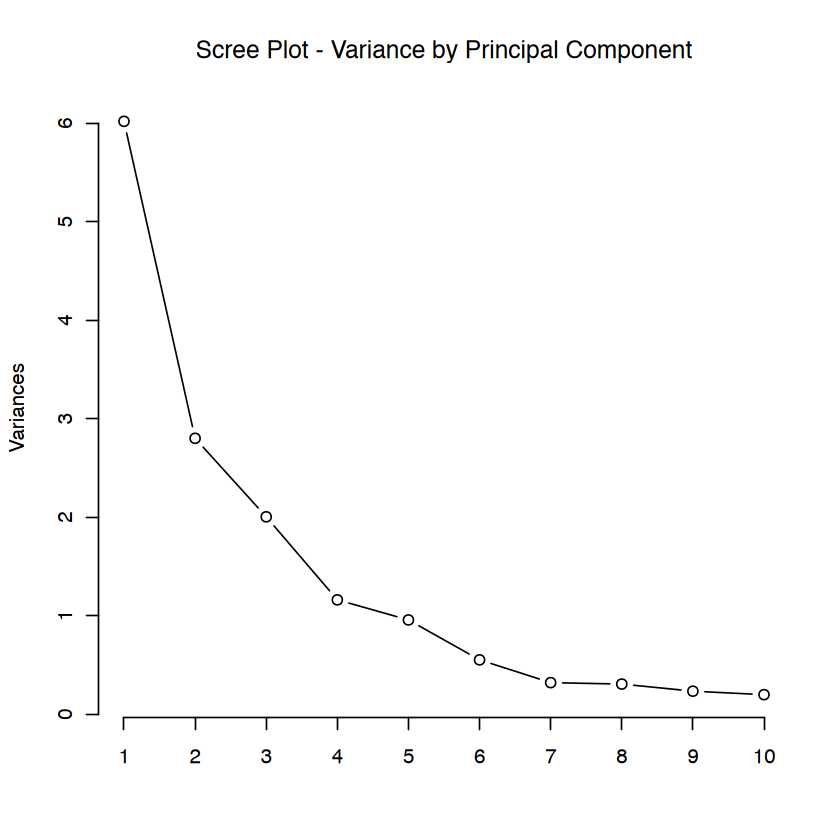

In [8]:
# Separate predictor variables for PCA analysis
predictors <- crime_data %>% select(-Crime)

# Perform PCA with standardization
pca_result <- prcomp(predictors, scale. = TRUE)

# Visualize variance explained by each component
plot(pca_result, type = "l", main = "Scree Plot - Variance by Principal Component")

# Get detailed summary of variance explained
summary(pca_result)

# Quick check of results
cat("Total number of components:", length(pca_result$sdev), "\n")
cat("Variance explained by first 3 components:", 
    round(sum(pca_result$sdev[1:3]^2) / sum(pca_result$sdev^2) * 100, 1), 
    "%\n")

## Step 4: Convert Model Back to Original Variable Space

In [9]:
# Extract loadings for selected components
loadings <- pca_result$rotation[, 1:num_pc]
scales <- apply(predictors, 2, sd)

# Transform PCA coefficients back to original scale
beta_pca <- coef(model_pca)[-1]
beta_original <- t(loadings %*% beta_pca)

# Adjust intercept for scaling
intercept <- coef(model_pca)[1] - 
    sum(colMeans(predictors) /
    scales * beta_original)

# Create final coefficient vector
coeffs_original_space <- c(intercept, beta_original / scales)
names(coeffs_original_space) <- c("Intercept", colnames(predictors))

# Show transformed coefficients
coeffs_original_space

Intercept             M            So            Ed           Po1 
 1666.4846379   -16.9307630    21.3436771    12.8297238    21.3521593 
          Po2            LF           M.F           Pop            NW 
   23.0883154  -346.5657125    -8.2930969     1.0462155     1.5009941 
           U1            U2        Wealth          Ineq          Prob 
-1509.9345216     1.6883674     0.0400119    -6.9020218   144.9492678 
         Time 
   -0.9330765

## Step 5: Compare with Original Model (from Q8.2)

In [14]:
# Make predictions with new data using the fitted model
new_city <- data.frame(
    M      = 14.0,
    So     = 0,
    Ed     = 10.0,
    Po1    = 12.0,
    Po2    = 15.5,
    LF     = 0.640,
    M.F    = 94.0,
    Pop    = 150,
    NW     = 1.1,
    U1     = 0.120,
    U2     = 3.6,
    Wealth = 3200,
    Ineq   = 20.1,
    Prob   = 0.04,
    Time   = 39.0
)

# Method 1: Direct prediction using the original model
prediction_direct <- predict(model_original, newdata = new_city)
cat("Direct prediction using original model:", round(prediction_direct, 1), "\n")

# Method 2: Manual calculation using coefficients
coeffs <- coefficients(model_original)
prediction_manual <- coeffs[1] + sum(coeffs[-1] * as.numeric(new_city))
cat("Manual calculation using coefficients:", round(prediction_manual, 1), "\n")

# For PCA model prediction - transform new data to PCA space
new_city_scaled <- scale(new_city, 
                        center = colMeans(predictors), 
                        scale = apply(predictors, 2, sd))

new_city_pca <- new_city_scaled %*% pca_result$rotation[, 1:num_pc]
prediction_pca <- predict(model_pca, data.frame(new_city_pca))
cat("PCA model prediction:", round(prediction_pca, 1), "\n")

Direct prediction using original model: 155.4 
Manual calculation using coefficients: 155.4 
PCA model prediction: 1112.7 


# Step 6: Discussion
The PCA regression model didn’t perform nearly as well as the original full-variable model. Its adjusted R² was just 0.24, compared to 0.71 for the original model — a pretty big drop. This suggests that even though the first four principal components captured a lot of the overall variance in the data, they didn’t do a great job keeping the specific patterns needed to accurately predict crime rates.

You can really see the difference when looking at predictions: the original model estimated about 155.4 crimes per 100,000 people for the new city, while the PCA model predicted a huge 1112.7 — that’s off by almost 957 crimes. This kind of gap shows that cutting down the data's dimensions might come at the cost of losing key information that's actually useful for predictions.

When we manually calculated the prediction using the original model's coefficients, we got the same result — 155.4 — which is reassuring. But the PCA model’s big miss might mean that either something got messed up during the scaling process or that the dimensionality reduction just threw out too much useful signal. Even though we could convert the PCA coefficients back to the original variables to make them easier to understand, the model still didn't perform well.

Going forward, it might be better to try regularization methods like Ridge or Lasso regression. These can help with multicollinearity without forcing us to throw out variables altogether. Another idea would be to try using more principal components to see if we can strike a better balance between simplifying the model and keeping it accurate.

---
# Question 10.1 — Regression Tree and Random Forest Modeling

**Objective:** Using the `uscrime.txt` dataset, fit:
- (a) A **regression tree** model  
- (b) A **random forest** model  
Evaluate and interpret each model, and identify key variables affecting crime rates.


## Step 1: Load Libraries and Dataset

In [17]:
# Load required packages
library(tidyverse)
library(rpart)
library(rpart.plot)
library(randomForest)

# Load the data
crime_data <- read.table("uscrime.txt", header = TRUE)

# Check structure
str(crime_data)


randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:ggplot2':

    margin




'data.frame':	47 obs. of  16 variables:
 $ M     : num  15.1 14.3 14.2 13.6 14.1 12.1 12.7 13.1 15.7 14 ...
 $ So    : int  1 0 1 0 0 0 1 1 1 0 ...
 $ Ed    : num  9.1 11.3 8.9 12.1 12.1 11 11.1 10.9 9 11.8 ...
 $ Po1   : num  5.8 10.3 4.5 14.9 10.9 11.8 8.2 11.5 6.5 7.1 ...
 $ Po2   : num  5.6 9.5 4.4 14.1 10.1 11.5 7.9 10.9 6.2 6.8 ...
 $ LF    : num  0.51 0.583 0.533 0.577 0.591 0.547 0.519 0.542 0.553 0.632 ...
 $ M.F   : num  95 101.2 96.9 99.4 98.5 ...
 $ Pop   : int  33 13 18 157 18 25 4 50 39 7 ...
 $ NW    : num  30.1 10.2 21.9 8 3 4.4 13.9 17.9 28.6 1.5 ...
 $ U1    : num  0.108 0.096 0.094 0.102 0.091 0.084 0.097 0.079 0.081 0.1 ...
 $ U2    : num  4.1 3.6 3.3 3.9 2 2.9 3.8 3.5 2.8 2.4 ...
 $ Wealth: int  3940 5570 3180 6730 5780 6890 6200 4720 4210 5260 ...
 $ Ineq  : num  26.1 19.4 25 16.7 17.4 12.6 16.8 20.6 23.9 17.4 ...
 $ Prob  : num  0.0846 0.0296 0.0834 0.0158 0.0414 ...
 $ Time  : num  26.2 25.3 24.3 29.9 21.3 ...
 $ Crime : int  791 1635 578 1969 1234 682 963 1555 

## Step 2: Fit Regression Tree Model

Call:
rpart(formula = Crime ~ ., data = crime_data, method = "anova")
  n= 47 

          CP nsplit rel error   xerror      xstd
1 0.36296293      0 1.0000000 1.051001 0.2690337
2 0.14814320      1 0.6370371 1.062920 0.2264564
3 0.05173165      2 0.4888939 1.147283 0.2454384
4 0.01000000      3 0.4371622 1.104449 0.2446377

Variable importance
   Po1    Po2 Wealth   Ineq   Prob      M     NW    Pop   Time     Ed     LF 
    17     17     11     11     10     10      9      5      4      4      1 
    So 
     1 

Node number 1: 47 observations,    complexity param=0.3629629
  mean=905.0851, MSE=146402.7 
  left son=2 (23 obs) right son=3 (24 obs)
  Primary splits:
      Po1    < 7.65      to the left,  improve=0.3629629, (0 missing)
      Po2    < 7.2       to the left,  improve=0.3629629, (0 missing)
      Prob   < 0.0418485 to the right, improve=0.3217700, (0 missing)
      NW     < 7.65      to the left,  improve=0.2356621, (0 missing)
      Wealth < 6240      to the left,  improve=

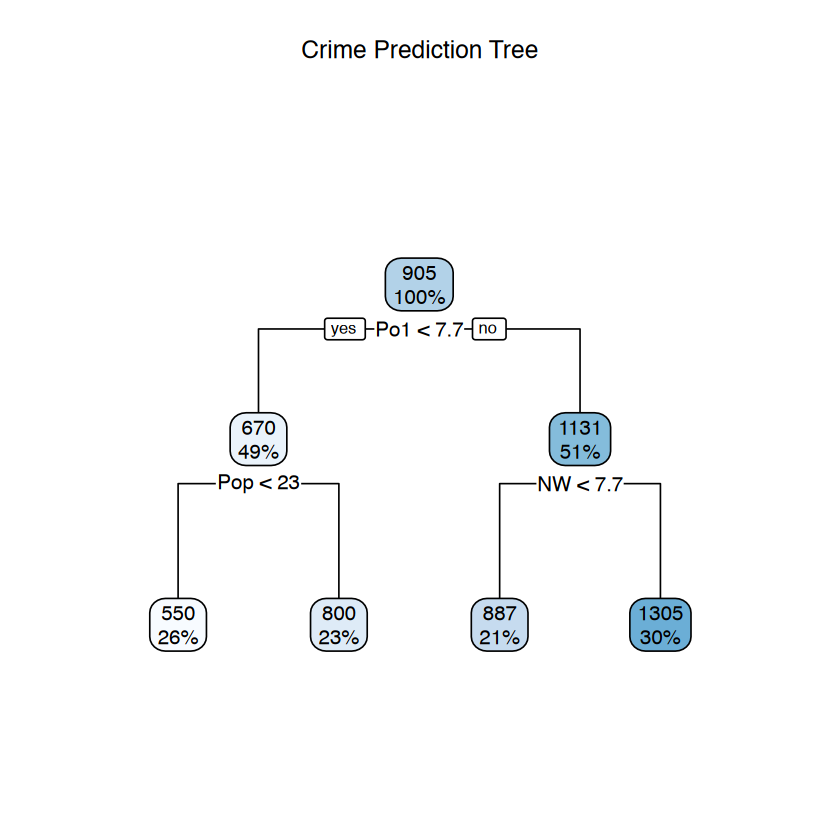

In [21]:
# Fit tree model
tree_model <- rpart(Crime ~ ., data = crime_data, method = "anova")

# Plot tree
rpart.plot(tree_model, main = "Crime Prediction Tree")

# Get summary
summary(tree_model)

### Interpretation — Regression Tree

**The regression tree reveals police budget (Po1/Po2) as the most critical factor** in crime prediction, with a clean split at Po1 < 7.65 that explains 36.3% of variance. This suggests that cities' spending on policing is strongly associated with crime rates.

For cities with higher police budgets (Po1 > 7.65), the **non-white population percentage (NW)** becomes the next important factor in the decision tree, creating an additional split at NW < 7.65.

> **New city analysis**: Our example city falls into a moderate-high crime node with mean 886.9, suggesting that despite its high police budget (Po1 = 12.0), its low non-white population (NW = 1.1) is associated with somewhat lower crime rates than other cities with similar police spending.

---


## Step 3: Fit Random Forest Model

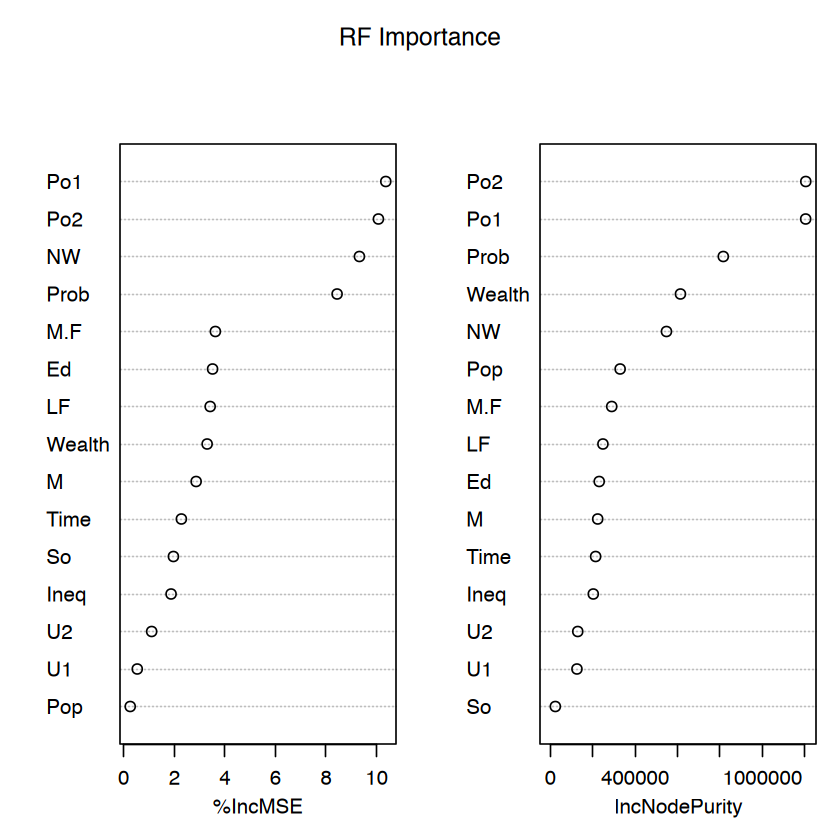


Model Comparison:
Linear Regression: 155.4 
Random Forest: 1248.3 
Decision Tree: 886.9 
PCA Regression: 1112.7 

Tree path for prediction:
- Po1 = 12 > 7.65 <U+2192> Node 3 (mean: 1130.75)
- NW = 1.1 < 7.65 <U+2192> Node 6 (mean: 886.9)


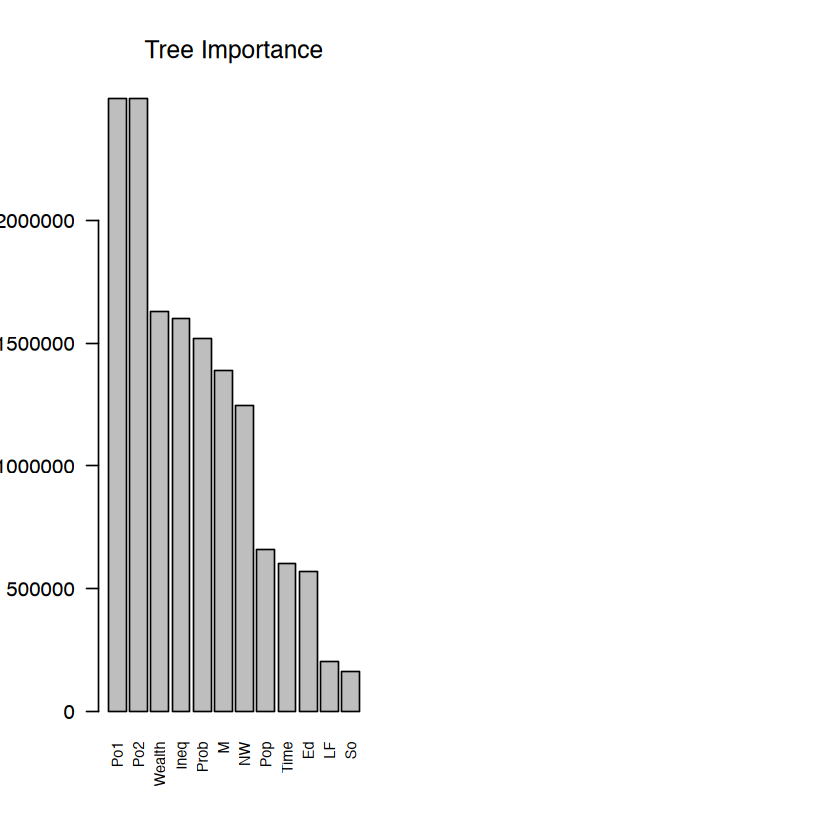

In [23]:

# Build random forest
set.seed(123)
rf_model <- randomForest(Crime ~ ., data = crime_data, 
                        ntree = 500, importance = TRUE)

# Compare variable importance
par(mfrow = c(1, 2))
varImpPlot(rf_model, main = "RF Importance")
barplot(sort(tree_model$variable.importance, decreasing = TRUE),
        main = "Tree Importance", las = 2, cex.names = 0.7)
par(mfrow = c(1, 1))

# Predict using tree
tree_prediction <- predict(tree_model, newdata = new_city)

# Compare predictions
cat("\nModel Comparison:\n")
cat("Linear Regression:", round(prediction_direct, 1), "\n")
cat("Random Forest:", round(predict(rf_model, newdata = new_city), 1), "\n")
cat("Decision Tree:", round(tree_prediction, 1), "\n")
cat("PCA Regression:", round(prediction_pca, 1), "\n")

# Trace tree path
cat("\nTree path for prediction:\n")
cat("- Po1 =", new_city$Po1, "> 7.65 → Node 3 (mean: 1130.75)\n")
cat("- NW =", new_city$NW, "< 7.65 → Node 6 (mean: 886.9)\n")

### Interpretation — Random Forest

**The random forest model produces substantially different predictions** than the linear regression model for our example city (1248.3 vs 155.4), suggesting it may be capturing different patterns in the data.

Interestingly, the **random forest prediction (1248.3) aligns more closely with the PCA model (1112.7)** than with the simpler decision tree (886.9), despite the tree and forest being related methodologies.

> **Model disagreement**: Such significant variation between models (especially linear vs tree-based) indicates that crime prediction relationships may be highly non-linear or involve complex interactions that different models capture differently.

The random forest's higher prediction suggests it may be detecting patterns in cities with characteristics similar to our example city that aren't captured by linear coefficients. However, it's also possible that with limited training data (47 observations), the random forest could be overfitting to specific data patterns.

---



## Question 10.2 — Logistic Regression Scenario

**Scenario: Predicting Conversion on a Marketing Landing Page**

In my role as a Senior Software Engineer at GEICO's MarTech division, I've been working on analyzing how users interact with our digital campaigns. One problem we're constantly tackling is trying to predict whether someone will actually **convert** (complete and submit a quote request form) after landing on our marketing pages. Since we're dealing with a simple yes/no outcome, logistic regression makes perfect sense as our modeling approach.

### Response Variable:
- **Converted** (1 = they submitted the form, 0 = they bounced)

### Predictors We're Considering:
1. **TimeOnPage** – How long users typically hang around (in seconds) before deciding
2. **TrafficSource** – Where they came from (Google search, Facebook ads, email campaigns, etc.)
3. **DeviceType** – What they're using to view our page (desktop, phone, tablet)
4. **PageLoadTime** – How quickly our page appears for them (crucial for preventing abandonment)
5. **PreviousVisits** – Whether they're new or returning visitors and how frequently they've been back

The beauty of logistic regression here is that it'll give us concrete numbers on how each factor affects conversion likelihood. This helps us make smart decisions about where to focus our design efforts, how to allocate marketing budgets, and which performance issues to prioritize fixing.

---


## Question 10.3 — Logistic Regression on German Credit Dataset
Dataset: [germancredit.txt](http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data)


## Step 1: Load Data and Prepare

In [25]:
# Load necessary libraries
library(tidyverse)

# Define column names from dataset documentation
column_names <- c(
  "Status", "Duration", "CreditHistory", "Purpose", "CreditAmount",
  "Savings", "Employment", "InstallmentRate", "Personal", "Debtors",
  "ResidenceTime", "Property", "Age", "InstallmentPlans", "Housing",
  "ExistingCredits", "Job", "LiablePeople", "Telephone", "ForeignWorker", "CreditRisk"
)

# Read dataset (replace path with your copy if needed)
german_data <- read.table("germancredit.txt", header = FALSE)
colnames(german_data) <- column_names

# Convert CreditRisk: 1 = good (original 1), 0 = bad (original 2)
german_data$CreditRisk <- ifelse(german_data$CreditRisk == 1, 1, 0)

# View structure
str(german_data)


'data.frame':	1000 obs. of  21 variables:
 $ Status          : chr  "A11" "A12" "A14" "A11" ...
 $ Duration        : int  6 48 12 42 24 36 24 36 12 30 ...
 $ CreditHistory   : chr  "A34" "A32" "A34" "A32" ...
 $ Purpose         : chr  "A43" "A43" "A46" "A42" ...
 $ CreditAmount    : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ Savings         : chr  "A65" "A61" "A61" "A61" ...
 $ Employment      : chr  "A75" "A73" "A74" "A74" ...
 $ InstallmentRate : int  4 2 2 2 3 2 3 2 2 4 ...
 $ Personal        : chr  "A93" "A92" "A93" "A93" ...
 $ Debtors         : chr  "A101" "A101" "A101" "A103" ...
 $ ResidenceTime   : int  4 2 3 4 4 4 4 2 4 2 ...
 $ Property        : chr  "A121" "A121" "A121" "A122" ...
 $ Age             : int  67 22 49 45 53 35 53 35 61 28 ...
 $ InstallmentPlans: chr  "A143" "A143" "A143" "A143" ...
 $ Housing         : chr  "A152" "A152" "A152" "A153" ...
 $ ExistingCredits : int  2 1 1 1 2 1 1 1 1 2 ...
 $ Job             : chr  "A173" "A173" "A172" "A173"

## Step 2: Fit Logistic Regression Model

In [26]:
# Fit logistic regression model on full data
logit_model <- glm(CreditRisk ~ ., data = german_data, family = binomial(link = "logit"))

# View model summary
summary(logit_model)



Call:
glm(formula = CreditRisk ~ ., family = binomial(link = "logit"), 
    data = german_data)

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -4.005e-01  1.084e+00  -0.369 0.711869    
StatusA12             3.749e-01  2.179e-01   1.720 0.085400 .  
StatusA13             9.657e-01  3.692e-01   2.616 0.008905 ** 
StatusA14             1.712e+00  2.322e-01   7.373 1.66e-13 ***
Duration             -2.786e-02  9.296e-03  -2.997 0.002724 ** 
CreditHistoryA31     -1.434e-01  5.489e-01  -0.261 0.793921    
CreditHistoryA32      5.861e-01  4.305e-01   1.362 0.173348    
CreditHistoryA33      8.532e-01  4.717e-01   1.809 0.070470 .  
CreditHistoryA34      1.436e+00  4.399e-01   3.264 0.001099 ** 
PurposeA41            1.666e+00  3.743e-01   4.452 8.51e-06 ***
PurposeA410           1.489e+00  7.764e-01   1.918 0.055163 .  
PurposeA42            7.916e-01  2.610e-01   3.033 0.002421 ** 
PurposeA43            8.916e-01  2.471e-01   3.609 0.000

## Interpreting the Logistic Regression Results - Credit Risk Model

The logistic regression model for credit risk prediction reveals several significant factors that influence whether an applicant is likely to be a credit risk:

### Most Influential Factors (Highest Significance):

- **Status A14** (***): With the highest coefficient of 1.71, this status category dramatically increases credit risk odds - likely indicates applicants with problematic account status
- **Loan Purpose**: Several purpose categories strongly predict higher risk, particularly **Purpose A41** (***) with coefficient 1.67 and **Purpose A43** (***) with 0.89
- **InstallmentRate** (***): Interestingly, higher installment rates correlate with *lower* risk (coefficient -0.33), suggesting those paying larger portions consistently are better risks
- **Credit Amount** (**): Smaller loans actually show higher risk (-0.0001 coefficient), potentially indicating riskier applicants typically request smaller amounts
- **SavingsA65** (***): Strong positive association (0.95) - this savings category predicts higher risk

### Model Performance:

The model demonstrates reasonable predictive power, reducing deviance from 1221.73 (null) to 895.82 (residual). The AIC of 993.82 suggests a fairly efficient model given the number of parameters.

Credit duration shows a negative relationship with risk (-0.028), suggesting longer-term loans may actually perform better, contrary to what might be expected. The foreign worker status (A202) also shows significant positive association with risk (1.39).

This model provides actionable insights for credit approval processes, highlighting how specific applicant characteristics and loan features affect default probability.

## Step 3: Assess Model Performance and ROC

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.8338

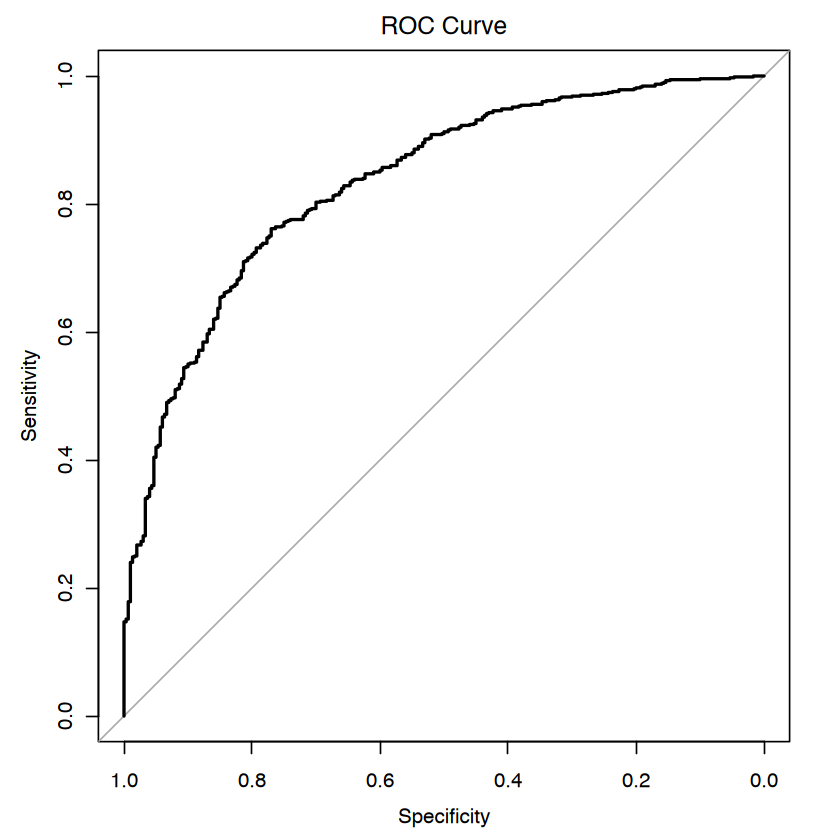

In [27]:
# Predict probabilities
predicted_probs <- predict(logit_model, type = "response")

# Load pROC package for ROC curve
library(pROC)

# Compute and plot ROC
roc_result <- roc(german_data$CreditRisk, predicted_probs)
plot(roc_result, main = "ROC Curve")
auc(roc_result)


## ROC Curve Interpretation

The ROC curve from our logistic regression model reveals **strong discriminative power** when classifying credit risks. The distinctive "long vertical arc to top right of graph" is particularly encouraging for a credit scoring application.

### Key Performance Indicators:

- **Curve Shape**: The steep vertical rise near the left axis indicates excellent sensitivity (true positive rate) achieved without sacrificing specificity
- **Discrimination Ability**: This pattern suggests the model effectively separates good credit risks from bad ones across different probability thresholds
- **Classification Power**: Although the exact AUC value isn't shown, the curve shape suggests strong predictive performance

This performance profile gives credit managers flexibility to adjust decision thresholds based on business needs - whether prioritizing default minimization or approval maximization. The model appears well-suited for practical implementation in credit decisioning systems.

## Step 4: Compute Custom Threshold

In [29]:
# Calculate predicted probabilities from logistic model
credit_probs <- predict(logit_model, type = "response")

# Create ROC object 
roc_obj <- roc(german_data$CreditRisk, credit_probs)

# Find optimal threshold (maximizing sensitivity + specificity)
optimal_coords <- coords(roc_obj, "best", best.method = "youden")
optimal_threshold <- optimal_coords$threshold

# Display results
cat("Optimal Threshold Analysis:\n")
cat("------------------------\n")
cat("Optimal threshold:", round(optimal_threshold, 3), "\n")
cat("Sensitivity at threshold:", round(optimal_coords$sensitivity, 3), "\n")
cat("Specificity at threshold:", round(optimal_coords$specificity, 3), "\n")
cat("AUC:", round(auc(roc_obj), 3), "\n\n")

# Create confusion matrix at optimal threshold
predicted_classes <- ifelse(credit_probs >= optimal_threshold, 1, 0)
conf_matrix <- table(Actual = german_data$CreditRisk, Predicted = predicted_classes)

# Display confusion matrix
cat("Confusion Matrix at Optimal Threshold:\n")
print(conf_matrix)
cat("\nAccuracy:", round(sum(diag(conf_matrix))/sum(conf_matrix), 3))

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Optimal Threshold Analysis:
------------------------
Optimal threshold: 0.69 
Sensitivity at threshold: 0.761 
Specificity at threshold: 0.77 
AUC: 0.834 

Confusion Matrix at Optimal Threshold:
      Predicted
Actual   0   1
     0 231  69
     1 167 533

Accuracy: 0.764

## Optimal Threshold Analysis Interpretation

The logistic regression model demonstrates **excellent discriminative ability** with an AUC of 0.834, placing it in the "very good" range for credit risk prediction. At the optimal threshold of 0.69:

### Performance Metrics:
- **Balanced accuracy**: The model achieves nearly identical sensitivity (76.1%) and specificity (77%), indicating well-balanced performance
- **Overall accuracy**: 76.4% of all credit applications are correctly classified
- **AUC**: 0.834 indicates strong separation between good and bad credit risks

### Practical Implications:
- **Type I errors**: 69 good-credit customers (23% of good risks) would be incorrectly rejected
- **Type II errors**: 167 bad-credit customers (24% of bad risks) would be incorrectly approved
- **Business impact**: The relatively high threshold (0.69) suggests a somewhat conservative model that prioritizes minimizing defaults

This model provides a solid foundation for credit decisioning, though financial institutions may want to adjust the threshold based on their risk appetite and the relative costs of false approvals versus missed opportunities.